# Soal 1 - Jamur Beracun 🍄

In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import (DecisionTreeClassifier, plot_tree, export_graphviz)    
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score

__Load Dataset__

In [165]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


___I make a copy of df so the orginal data won't change___

In [210]:
df2 = df.copy()
df2.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


__Information:__

- classes: e = edible, p = poisonous $\Rightarrow$ __TARGET__
- cap-shape: b = bell, c = conical, x = convex, f = flat, k = knobbed, s = sunken
- cap-surface: f = fibrous,g = grooves, y = scaly, s = smooth
- cap-color: n = brown, b = buff, c = cinnamon, g = gray, r = green, p = pink, u = purple, e = red, w = white,y = yellow
- bruises: t = bruises, f = no
- odor: a = almond, l = anise, c = creosote, y = fishy, f = foul, m = musty, n = none, p = pungent, s = spicy
- gill-attachment: a = attached, d = descending, f = free, n = notched
- gill-spacing: c = close, w = crowded, d = distant
- gill-size: b = broad, n = narrow
- gill-color: k = black, n = brown, b = buff, h = chocolate, g = gray, r = green, o = orange, p = pink, u = purple, e = red, w = white, y = yellow
- stalk-shape: e = enlarging, t = tapering
- stalk-root: b = bulbous, c = club, u = cup, e = equal, z = rhizomorphs, r = rooted, ? = missing
- stalk-surface-above-ring: f = fibrous, y = scaly, k = silky, s = smooth
- stalk-surface-below-ring: f = fibrous, y = scaly, k = silky, s = smooth
- stalk-color-above-ring: n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
- stalk-color-below-ring: n = brown, b = buff, c = cinnamon, g = gray, o = orange, p = pink, e = red, w = white, y = yellow
- veil-type: p = partial, u = universal
- veil-color: n = brown, o = orange, w = white, y = yellow
- ring-number: n = none, o = one, t = two
- ring-type: c = cobwebby, e = evanescent, f = flaring, l = large, n = none, p = pendant s = sheathing, z = zone
- spore-print-color: k = black, n = brown, b = buff, h = chocolate, r = green, o = orange, u = purple, w = white, y = yellow
- population: a = abundant, c = clustered, n = numerous, s = scattered, v = several, y = solitary
- habitat: g = grasses, l = leaves, m = meadows, p = paths, u = urban, w = waste, d = woods

__Separate feature $x$ & target $y$__

In [236]:
df2cols = df2.columns
x = df2cols[1:].to_list()

In [237]:
x = df2[x]
y = df2['class']

__Labelling Target__

In [238]:
labelOE = OrdinalEncoder(categories=[['e', 'p']])
labelOE.fit(df2[['class']])

OrdinalEncoder(categories=[['e', 'p']], dtype=<class 'numpy.float64'>)

In [239]:
labelOE.categories_

[array(['e', 'p'], dtype=object)]

In [240]:
classlabel = labelOE.transform(df[['class']])
classlabel

array([[1.],
       [0.],
       [0.],
       ...,
       [0.],
       [1.],
       [0.]])

__Labelling Features__

In [241]:
dfDummy = pd.get_dummies(x)
dfDummy

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


__Combine dfDummy with classlabel into 1 DataFrame $\Rightarrow$ dfLabel $\rightarrow$ will use this for model__

In [242]:
dfLabel = pd.DataFrame(dfDummy)
dfLabel['class'] = classlabel
dfLabel.head()

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1.0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0.0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,0,1,0,1.0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0.0


In [244]:
columns_names = list(dfLabel.columns)
x = columns_names[:-1]
# x

__Splitting__

In [245]:
xtr, xts, ytr, yts = train_test_split(
    dfLabel[x], dfLabel['class'], train_size=.8
)
xtr, xts, ytr, yts

(      cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
 1088            0            0            1            0            0   
 5138            0            0            1            0            0   
 4633            0            0            1            0            0   
 5813            0            0            1            0            0   
 5043            0            0            0            0            0   
 ...           ...          ...          ...          ...          ...   
 2080            0            0            0            0            0   
 193             0            0            1            0            0   
 6986            0            0            0            0            0   
 6172            0            0            1            0            0   
 7041            0            0            1            0            0   
 
       cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
 1088            0          

In [246]:
print(len(xtr), len(xts), len(ytr), len(yts))

6499 1625 6499 1625


### __Creating Machine Learning Model:__

### __1. Logistic Regression__

In [247]:
modelLR = LogisticRegression(multi_class='auto', solver='liblinear')

__Train model with 80% data (random)__

In [248]:
modelLR.fit(xtr, ytr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

__Predict__

In [249]:
dfLabel['pred'] = modelLR.predict(dfLabel[x])
dfLabel

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class,pred
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,1.0,1.0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0.0,0.0
2,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0.0,0.0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,1.0,1.0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
8120,0,0,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0.0,0.0
8122,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1.0,1.0


__Probability__

In [250]:
proba = modelLR.predict_proba(dfLabel[x])

dfLabel['proba0'] = proba[:, 0]
dfLabel['proba1'] = proba[:, 1]
dfLabel

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class,pred,proba0,proba1
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,1.0,1.0,0.013768,0.986232
1,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0.0,0.0,0.998930,0.001070
2,1,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0.0,0.0,0.997117,0.002883
3,0,0,0,0,0,1,0,0,0,1,...,0,0,0,0,1,0,1.0,1.0,0.009989,0.990011
4,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0.0,0.0,0.999934,0.000066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0.0,0.0,0.994901,0.005099
8120,0,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0.0,0.0,0.998349,0.001651
8121,0,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0.0,0.0,0.998063,0.001937
8122,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,1.0,1.0,0.002154,0.997846


__Check Incorrect Prediction__

In [251]:
dfLabel[dfLabel['class'] != dfLabel['pred']]

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,class,pred,proba0,proba1


__Model Accuracy for data trainnig & data testing__

In [252]:
print(modelLR.score(xtr, ytr))
print(modelLR.score(xts, yts))

1.0
1.0


#### Evaluation Metrics:

__Confusion Matrix__

In [253]:
cm = confusion_matrix(dfLabel['class'], dfLabel['pred'], labels=[0, 1])
cm

array([[4208,    0],
       [   0, 3916]], dtype=int64)

In [254]:
dfcm = pd.DataFrame(
    cm, columns=['Pred 1 / Poisonous', 'Pred 0 / Edible'], index=['Actual 1 / Poisonous', 'Actual 0 / Edible']
)
dfcm

,Pred 1 / Poisonous,Pred 0 / Edible
Actual 1 / Poisonous,4208,0
Actual 0 / Edible,0,3916


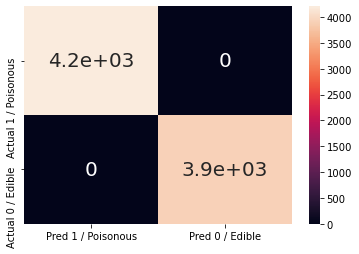

In [255]:
sb.heatmap(dfcm, annot=True, annot_kws={'size':20})
plt.show()

_All mushroom are classified correctly as edible or poisonous_

__Accuracy, Error Rate, Recall (+), Recall (-), Precision (+), Precision (-), F1 Score (+), F1 Score (-)__

In [304]:
print('Accuracy :', accuracy_score(dfLabel['class'], dfLabel['pred']))
print('Error Rate:', 1 - accuracy_score(dfLabel['class'], dfLabel['pred']))
print('Recall(+) = ', recall_score(dfLabel['class'], dfLabel['pred'], pos_label=1))
print('Recall(-) = ', recall_score(dfLabel['class'], dfLabel['pred'], pos_label=0))
print('Precision(+) =', precision_score(dfLabel['class'], dfLabel['pred'], pos_label=1))
print('Precision(-) =', precision_score(dfLabel['class'], dfLabel['pred'], pos_label=0))
print('f1 score(+) =', f1_score(dfLabel['class'], dfLabel['pred'], pos_label=1))
print('f1 score(-) =', f1_score(dfLabel['class'], dfLabel['pred'], pos_label=0))

Accuracy : 1.0
Error Rate: 0.0
Recall(+) =  1.0
Recall(-) =  1.0
Precision(+) = 1.0
Precision(-) = 1.0
f1 score(+) = 1.0
f1 score(-) = 1.0


__ROC AUC__

In [257]:
fpr, tpr, thres = roc_curve(dfLabel['class'], dfLabel['proba1'])
fpr, tpr, thres

(array([0., 0., 0., 1.]),
 array([0.00000000e+00, 2.55362615e-04, 1.00000000e+00, 1.00000000e+00]),
 array([1.99999229e+00, 9.99992294e-01, 6.20997401e-01, 6.59074076e-06]))

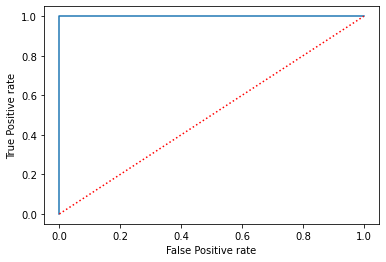

In [258]:
plt.plot(fpr, tpr)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [259]:
roc_auc_score(dfLabel['class'], dfLabel['pred'])

1.0

### __2. Decision Tree__

In [263]:
modelDT = DecisionTreeClassifier(criterion='gini')

In [264]:
modelDT.fit(xtr, ytr)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [271]:
dfLabel['PredDT'] = modelDT.predict(dfLabel[x])

In [277]:
probaDT = modelDT.predict_proba(dfLabel[x])

dfLabel['ProbaDT1'] = probaDT[:,1]
dfLabel

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,habitat_m,habitat_p,habitat_u,habitat_w,class,pred,proba0,proba1,PredDT,ProbaDT1
0,0,0,0,0,0,1,0,0,1,0,...,0,0,1,0,1.0,1.0,0.013768,0.986232,1.0,1.0
1,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.998930,0.001070,0.0,0.0
2,1,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0.0,0.0,0.997117,0.002883,0.0,0.0
3,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,1.0,1.0,0.009989,0.990011,1.0,1.0
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.999934,0.000066,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.994901,0.005099,0.0,0.0
8120,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0.0,0.0,0.998349,0.001651,0.0,0.0
8121,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0.0,0.0,0.998063,0.001937,0.0,0.0
8122,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1.0,1.0,0.002154,0.997846,1.0,1.0


In [270]:
export_graphviz(
    modelDT.fit(dfLabel[x],dfLabel['class']),
    feature_names = x,
    class_names = ['Edible', 'Poisonous'],
    out_file = 'mushroomtree.dot',
    rounded=True, filled=True
)

<img src = "http://localhost:8890/files/UjianMachineLearning/graphviz%20(1).png?_xsrf=2%7Ca53b3481%7Cce7844ce6e8932648a200eaa02191e8c%7C1587319279" width=700>

#### Evaluation Metrics:

__Confusion Matrix__

In [286]:
cm1 = confusion_matrix(dfLabel['class'], dfLabel['PredDT'], labels=[0, 1])
cm1

array([[4208,    0],
       [   0, 3916]], dtype=int64)

In [289]:
dfcm1 = pd.DataFrame(
    cm1, columns=['Pred 1 / Poisonous', 'Pred 0 / Edible'], index=['Actual 1 / Poisonous', 'Actual 0 / Edible']
)
dfcm1

,Pred 1 / Poisonous,Pred 0 / Edible
Actual 1 / Poisonous,4208,0
Actual 0 / Edible,0,3916


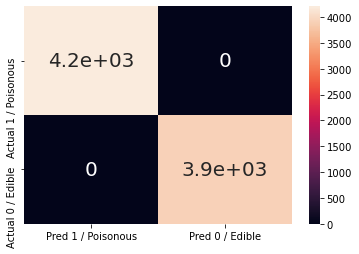

In [290]:
sb.heatmap(dfcm1, annot=True, annot_kws={'size':20})
plt.show()

_All mushroom are classified correctly as edible or poisonous_

__Accuracy, Error Rate, Recall (+), Recall (-), Precision (+), Precision (-), F1 Score (+), F1 Score (-)__

In [306]:
print('Accuracy :', accuracy_score(dfLabel['class'], dfLabel['PredDT']))
print('Error Rate:', 1 - accuracy_score(dfLabel['class'], dfLabel['PredDT']))
print('Recall(+) = ', recall_score(dfLabel['class'], dfLabel['PredDT'], pos_label=1))
print('Recall(-) = ', recall_score(dfLabel['class'], dfLabel['PredDT'], pos_label=0))
print('Precision(+) =', precision_score(dfLabel['class'], dfLabel['PredDT'], pos_label=1))
print('Precision(-) =', precision_score(dfLabel['class'], dfLabel['PredDT'], pos_label=0))
print('f1 score(+) =', f1_score(dfLabel['class'], dfLabel['PredDT'], pos_label=1))
print('f1 score(-) =', f1_score(dfLabel['class'], dfLabel['PredDT'], pos_label=0))

Accuracy : 1.0
Error Rate: 0.0
Recall(+) =  1.0
Recall(-) =  1.0
Precision(+) = 1.0
Precision(-) = 1.0
f1 score(+) = 1.0
f1 score(-) = 1.0


__ROC AUC__

In [279]:
fpr1, tpr1, thres1 = roc_curve(dfLabel['class'], dfLabel['ProbaDT1'])
fpr1, tpr1, thres1

(array([0., 0., 1.]), array([0., 1., 1.]), array([2., 1., 0.]))

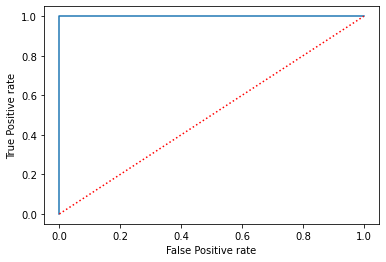

In [280]:
plt.plot(fpr1, tpr1)
plt.plot([0,1], [0,1], 'r:')
plt.xlabel('False Positive rate')
plt.ylabel('True Positive rate')
plt.show()

In [282]:
roc_auc_score(dfLabel['class'], dfLabel['PredDT'])

1.0